In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = '<style>svg{width:50% !importamt;height:50% !important;}<style>'
HTML(style)

In [61]:
pd.set_option('display.max_columns', None)
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')#, index_col='PassengerId'
print(titanic_train)
# print(titanic_test.info())

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [62]:
df = pd.concat([titanic_train, titanic_test], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


<AxesSubplot:>

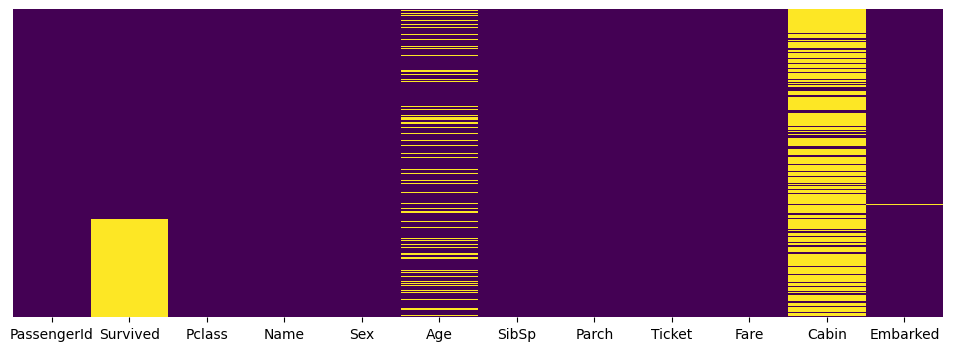

In [63]:
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')#

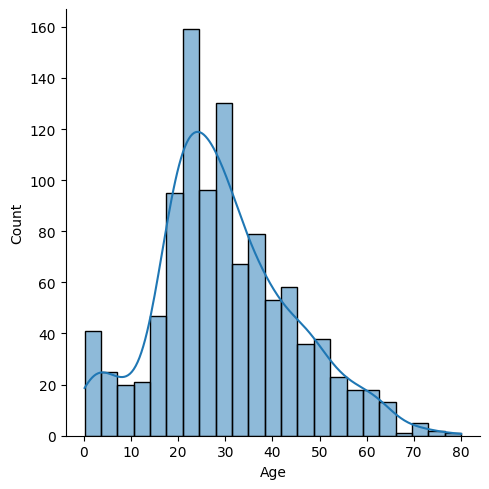

In [64]:
sns.displot(df['Age'], kde=True)

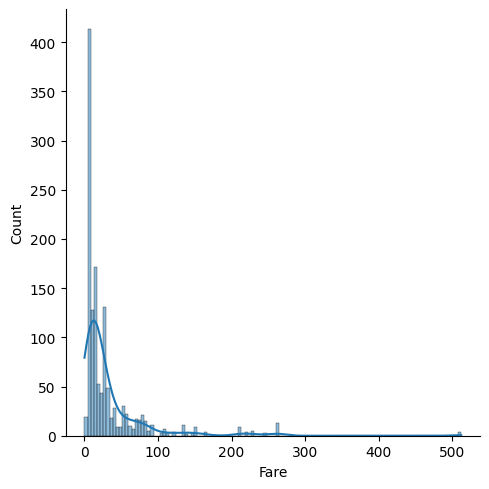

In [65]:
sns.displot(df.Fare, kde=True)

In [66]:
temp_df = df[['Ticket', 'Fare']].value_counts().reset_index()
temp_df['Price'] = temp_df['Fare']/temp_df[0]
temp_df.rename(columns={0:'Ticket_Count'},inplace=True)
temp_df

,Ticket,Fare,Ticket_Count,Price
0,CA. 2343,69.5500,11,6.322727
1,1601,56.4958,8,7.061975
2,CA 2144,46.9000,8,5.862500
3,3101295,39.6875,7,5.669643
4,347077,31.3875,7,4.483929
...,...,...,...,...
924,342826,8.0500,1,8.050000
925,343095,8.0500,1,8.050000
926,343120,7.6500,1,7.650000
927,343271,7.0000,1,7.000000


In [67]:
df = pd.merge(df, temp_df, how='left', on=['Ticket', 'Fare'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Count,Price
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,7.250000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,35.641650
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,7.925000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,26.550000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,8.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1.0,8.050000
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3.0,36.300000
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1.0,7.250000
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1.0,8.050000


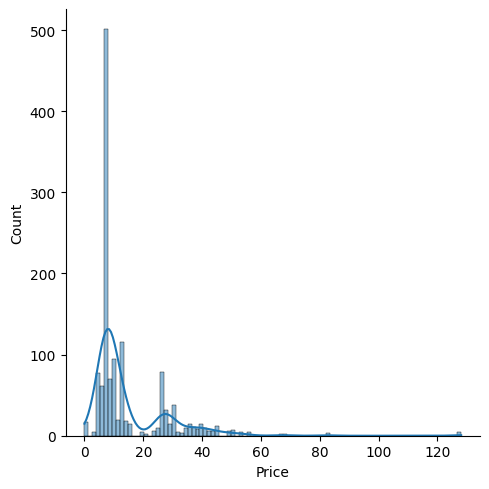

In [68]:
sns.displot(df.Price, kde=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Survived      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   Name          1309 non-null   object 
 4   Sex           1309 non-null   object 
 5   Age           1046 non-null   float64
 6   SibSp         1309 non-null   int64  
 7   Parch         1309 non-null   int64  
 8   Ticket        1309 non-null   object 
 9   Fare          1308 non-null   float64
 10  Cabin         295 non-null    object 
 11  Embarked      1307 non-null   object 
 12  Ticket_Count  1308 non-null   float64
 13  Price         1308 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 153.4+ KB


In [70]:
import numpy as np
# def cabin_count(x):
#     if str(x) == 'nan':
#         return 0
#     else: return len(str(x).split(" "))
# df['Cabin_Count'] =df['Cabin'].apply(cabin_count)
df['Price'].replace(to_replace=0,value=np.nan,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Count,Price
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,7.250000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,35.641650
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,7.925000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,26.550000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,8.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1.0,8.050000
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3.0,36.300000
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1.0,7.250000
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1.0,8.050000


In [85]:
df_train = df[df['PassengerId']<892]
df_test = df[df['PassengerId']>=892]
df_train = df_train.set_index('PassengerId')
df_test = df_test.set_index('PassengerId')
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Count,Price
PassengerId,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,7.25000
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,35.64165
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,7.92500
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,26.55000
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1.0,13.00000
888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0,30.00000
889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4.0,5.86250


In [86]:
X_train = df_train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Ticket_Count', 'Fare'], axis=1)
Y_train = df_train.Survived
X_train = pd.get_dummies(X_train)
X_train = X_train.fillna({'Age': X_train.Age.median()})
X_train = X_train.fillna({'Price': X_train.Price.median()})
X_test = df_test.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Ticket_Count', 'Fare'], axis=1)
X_test = pd.get_dummies(X_test)
X_test = X_test.fillna({'Age': X_test.Age.median()})
X_test = X_test.fillna({'Price': X_test.Price.median()})

In [87]:
X

,Pclass,Age,SibSp,Parch,Price,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.25000,0,1,0,0,1
2,1,38.0,1,0,35.64165,1,0,1,0,0
3,3,26.0,0,0,7.92500,1,0,0,0,1
4,1,35.0,1,0,26.55000,1,0,0,0,1
5,3,35.0,0,0,8.05000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.00000,0,1,0,0,1
888,1,19.0,0,0,30.00000,1,0,0,0,1
889,3,28.0,1,2,5.86250,1,0,0,0,1


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
rf = RandomForestClassifier(criterion='entropy')#, max_depth=6, n_estimators=93
parametrs = {'n_estimators': range(30, 100, 3), 'max_depth': range(1, 30)}
grid_search_cv_clf = GridSearchCV(rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, Y_train)
print(grid_search_cv_clf.best_params_)
best_clf = grid_search_cv_clf.best_estimator_
print(best_clf.score(X_train, Y_train))

{'max_depth': 9, 'n_estimators': 54}
0.9281705948372615


In [90]:
y_pred = best_clf.predict(X_test)
Submission = pd.DataFrame({'Survived': y_pred})
Submission.index = X_test.index
print(Submission.head())
Submission.to_csv('Submission.csv')

             Survived
PassengerId          
892               0.0
893               0.0
894               0.0
895               0.0
896               1.0


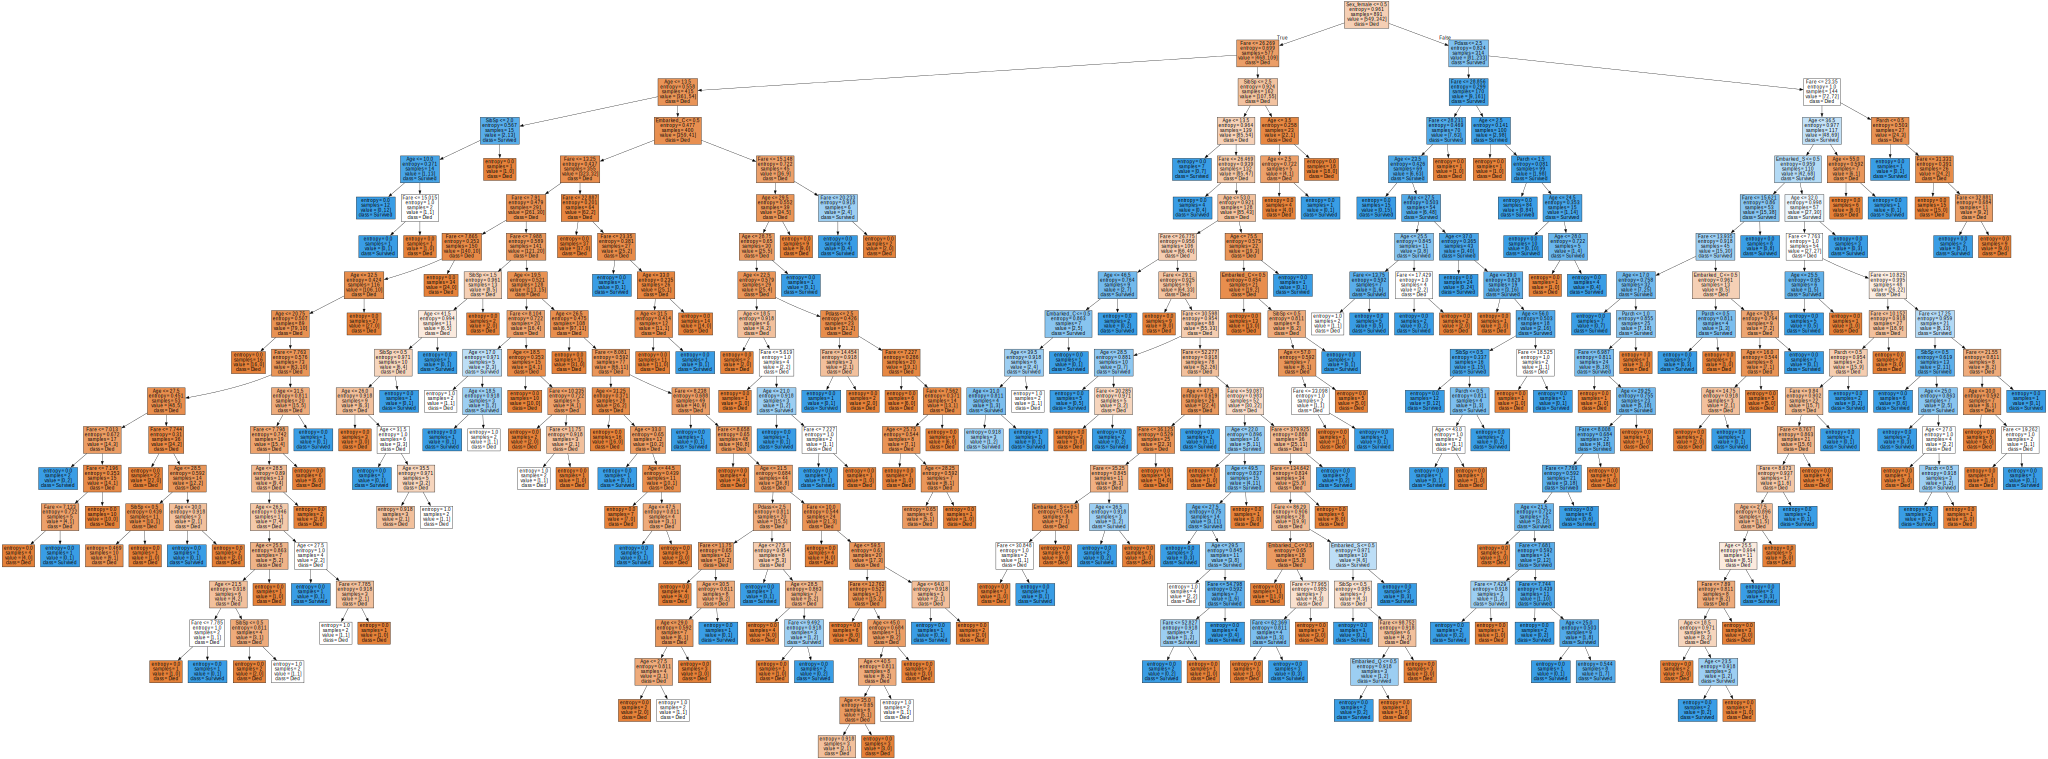

In [42]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [46]:
from sklearn.model_selection import train_test_split


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)